In [1]:
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import requests
import numpy as np
from PIL import Image
import os

In [2]:
def get_wiki_text(url):
    
    page = requests.get(url)
                    
    soup = BeautifulSoup(page.text, 'html.parser')
    
    title = soup.find('h1',{'id':'firstHeading'}).text
    content = soup.find('div',{'id':'content'})
    
    
    text = ''
    for paragraph in content.find_all('p'):
        text = text + '\n' + paragraph.text
        
    return title, text

In [69]:
def create_wiki_word_cloud(url,mask_file=None,**kwargs):
    
    title, text = get_wiki_text(url)
    
    if mask_file:
        mask = np.array(Image.open(mask_file))
    else:
        mask = None
    
    stopwords = set(STOPWORDS)

    params = {'mask':mask,
              'background_color':'white', 
              'max_words':200, 
              'stopwords':stopwords, 
              'mask':mask,
              'contour_width':3,
              'contour_color':'steelblue'}
    
    params.update(kwargs)
    
    wc = WordCloud(**params)
                   
    #wc = WordCloud(background_color="white", 
    #               max_words=200, 
    #               stopwords=stopwords, 
    #               mask=mask,
    #               contour_width=3,
    #               contour_color='steelblue')

    # generate word cloud
    wc.generate(text)

    wc.to_file('outputs/'+str(title)+'.png')

    plt.imshow(wc)
    
    

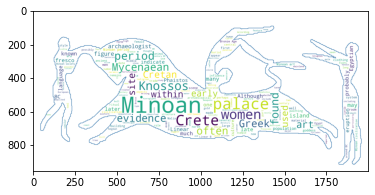

In [65]:
url = "https://en.wikipedia.org/wiki/Minoan_civilization"
mask_file = "masks/crete-bull.bmp"

create_wiki_word_cloud(url,mask_file=mask_file)

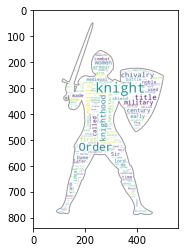

In [72]:
url = "https://en.wikipedia.org/wiki/Knight"
mask_file = "masks/knight.bmp"

create_wiki_word_cloud(url,mask_file=mask_file,contour_color='gray')

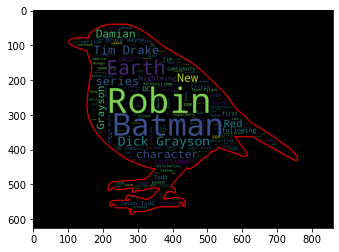

In [70]:
url = "https://en.wikipedia.org/wiki/Robin_(character)"
mask_file = "masks/robin.bmp"

create_wiki_word_cloud(url,mask_file=mask_file,background_color='black',contour_color='red')